<a href="https://colab.research.google.com/github/aguscura/UBA-data-science/blob/main/tp1_p20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P20
Buscar la distancia mínima que existe entre dos locales de McDonald ‘s en el estado de LA (que no comparten dirección). 

*   ¿Cuál es la distancia?¿A qué ciudad/es pertenecen? 

*   ¿Cuáles son las direcciones de los locales?

In [279]:
#!gdown "14sjAJe8wBi7N_1xxJFCm7Mtzrm_gFiPj"


In [280]:
import pandas as pd
df = pd.read_csv('/content/business.csv')
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,0.0,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,8.0,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,11.0,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,37.0,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13.0,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,5.0,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,4.0,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,5.0,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,12.0,1,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  float64
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 16.1+ MB


In [282]:
df["name"].describe()

count        150346
unique       114117
top       Starbucks
freq            724
Name: name, dtype: object

In [283]:
df = df[(df['name'] == "McDonald's")][["name","address","city","state","latitude","longitude"]]

In [284]:
df = df[(df['state'] == 'LA')].sort_values(["address", "city"])
df["address"].value_counts()


501 Westbank Expy              2
10001 I 10 Service Rd          1
3250 General Degaulle Dr       1
3321 Saint Charles Ave         1
3401 Paris Rd                  1
3407 Lapalco Blvd              1
3443 S Carrollton              1
3532 Severn Ave                1
4240 Louisa St                 1
4589 General Meyer Ave         1
5315 Veterans Memorial Blvd    1
6005 Bullard Rd                1
6140 Westbank Expwy            1
6401 Airline Hwy               1
701 Clearview Pkwy             1
709 Terry Pkwy                 1
711 Canal St                   1
7862 Hwy 23                    1
8319 W Judge Perez             1
3313 Cleary Ave                1
3025 Elysian Fields Ave        1
1151 S Clearview Pkwy          1
3013 Loyola Dr                 1
1212 Stumpf Blvd               1
1309 W Esplanade Ave           1
140 Lapalco Blvd               1
1505 Manhattan Blvd            1
1681 Barataria Blvd            1
1901 Tchoupitoulas St          1
1918 N Broad St                1
2126 Airli

In [285]:
"""
Hay 2 locales que comparten direccion.. pero en distintas ciudades.
No borro duplicados porque voy a tener en cuenta ambos locales para las distancias con el resto de los McDonald's.
Luego si la distancia mínima es entre ellos, no la tengo en cuenta y tomo la siguiente distancia mas corta
"""

"\nHay 2 locales que comparten direccion.. pero en distintas ciudades.\nNo borro duplicados porque voy a tener en cuenta ambos locales para las distancias con el resto de los McDonald's.\nLuego si la distancia mínima es entre ellos, no la tengo en cuenta y tomo la siguiente distancia mas corta\n"

In [286]:
df

,name,address,city,state,latitude,longitude
108794,McDonald's,10001 I 10 Service Rd,New Orleans,LA,30.038396,-89.975671
45761,McDonald's,1151 S Clearview Pkwy,Jefferson,LA,29.961776,-90.183633
130671,McDonald's,1212 Stumpf Blvd,Gretna,LA,29.914610,-90.046379
89658,McDonald's,1309 W Esplanade Ave,Kenner,LA,30.020080,-90.250600
133919,McDonald's,140 Lapalco Blvd,Gretna,LA,29.881903,-90.023103
118501,McDonald's,1505 Manhattan Blvd,Harvey,LA,29.894595,-90.059725
115313,McDonald's,1681 Barataria Blvd,Marrero,LA,29.879620,-90.098122
53251,McDonald's,1901 Tchoupitoulas St,New Orleans,LA,29.925115,-90.070156
128745,McDonald's,1918 N Broad St,New Orleans,LA,29.983655,-90.070845
59760,McDonald's,2126 Airline Hwy,Kenner,LA,29.980177,-90.243775


Distancia a partir de coordenadas:
https://www.movable-type.co.uk/scripts/latlong.html

In [287]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, sqrt, atan2, radians

def distance(point1, point2):

    #constante - R is earth’s radius (mean radius = 6,371km)
    R = 6373.0 

    lat1 = radians(point1['latitude'])
    lon1 = radians(point1['longitude'])
    lat2 = radians(point2['latitude'])
    lon2 = radians(point2['longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [288]:
df = df.reset_index()
df

,index,name,address,city,state,latitude,longitude
0,108794,McDonald's,10001 I 10 Service Rd,New Orleans,LA,30.038396,-89.975671
1,45761,McDonald's,1151 S Clearview Pkwy,Jefferson,LA,29.961776,-90.183633
2,130671,McDonald's,1212 Stumpf Blvd,Gretna,LA,29.914610,-90.046379
3,89658,McDonald's,1309 W Esplanade Ave,Kenner,LA,30.020080,-90.250600
4,133919,McDonald's,140 Lapalco Blvd,Gretna,LA,29.881903,-90.023103
5,118501,McDonald's,1505 Manhattan Blvd,Harvey,LA,29.894595,-90.059725
6,115313,McDonald's,1681 Barataria Blvd,Marrero,LA,29.879620,-90.098122
7,53251,McDonald's,1901 Tchoupitoulas St,New Orleans,LA,29.925115,-90.070156
8,128745,McDonald's,1918 N Broad St,New Orleans,LA,29.983655,-90.070845
9,59760,McDonald's,2126 Airline Hwy,Kenner,LA,29.980177,-90.243775


In [289]:
shape = (len(df),len(df))
dist_matrix = np.zeros(shape)
min = 999999999999

for i in df.index:
  for j in df.index:
    d = distance(df.loc[i], df.loc[j])
    dist_matrix[i][j] = d
    if d == 0:
      continue
    elif (d < min):
      min = d
      min_idx = i
      min_idx_2 = j

distances_df = pd. DataFrame(dist_matrix, columns=df["index"], index=df["index"])
distances_df

index,108794,45761,130671,89658,133919,118501,115313,53251,128745,59760,...,19709,53847,143547,68586,48589,53123,145369,52035,71783,45869
index,,,,,,,,,,,,,,,,,,,,,
108794,0.000000,21.770065,15.361994,26.553801,17.996804,17.928783,21.240193,15.544583,11.004781,26.623026,...,21.959413,1.769736,20.793324,22.915674,20.602224,16.267714,13.044432,19.668910,9.434808,24.978846
45761,21.770065,0.000000,14.231897,9.147581,17.844556,14.089345,12.307080,11.672703,11.136853,6.145832,...,5.274127,23.536820,10.082715,2.581656,2.177719,16.341350,11.067116,21.120897,19.829927,3.275268
130671,15.361994,14.231897,0.000000,22.910198,4.274628,2.571438,6.327882,2.572874,8.033659,20.374767,...,18.068953,16.678019,6.843966,16.654125,14.759840,2.282752,4.859724,7.507156,7.883565,17.090298
89658,26.553801,9.147581,22.910198,0.000000,26.775595,23.090642,21.448583,20.343817,17.782874,4.486889,...,5.022776,28.265400,19.225001,6.567330,8.154685,25.122322,18.978810,30.086340,27.276361,7.796296
133919,17.996804,17.844556,4.274628,26.775595,0.000000,3.803379,7.239610,6.609528,12.217656,23.915877,...,22.050104,19.049331,8.828136,20.361511,18.634165,2.104646,9.126399,3.323601,9.079497,20.445433
118501,17.928783,14.089345,2.571438,23.090642,3.803379,0.000000,4.060321,3.540623,9.963953,20.132977,...,18.453611,19.249367,5.183455,16.626641,14.981870,2.937158,6.623549,7.033378,10.248058,16.645277
115313,21.240193,12.307080,6.327882,21.448583,7.239610,4.060321,0.000000,5.734044,11.866743,17.950845,...,17.262865,22.684073,2.224402,14.882560,13.704725,6.956071,8.686374,9.948971,14.200374,14.288637
53251,15.544583,11.672703,2.572874,20.343817,6.609528,3.540623,5.734044,0.000000,6.511699,17.817981,...,15.522445,17.031090,5.386168,14.083155,12.191260,4.790563,3.167101,9.920050,9.423560,14.575285
128745,11.004781,11.136853,8.033659,17.782874,12.217656,9.963953,11.866743,6.511699,0.000000,16.665548,...,12.776690,12.728933,10.730031,12.754232,10.426277,10.119253,3.349477,15.244184,9.543430,14.410654


In [290]:
print("Distancia minima: ", min)

Distancia minima:  1.1588890967327927


In [291]:
primer_local = df["index"][min_idx]
df[(df['index'] == primer_local)]

,index,name,address,city,state,latitude,longitude
2,130671,McDonald's,1212 Stumpf Blvd,Gretna,LA,29.91461,-90.046379


In [292]:
segundo_local = df["index"][min_idx_2]
df[(df['index'] == segundo_local)]

,index,name,address,city,state,latitude,longitude
30,54783,McDonald's,501 Westbank Expy,Gretna,LA,29.910136,-90.057234


In [293]:
# Respuesta
"""
La distancia minima es 1.1588890967327927 KM
Pertenecen a la ciudad de Gretna
Las direcciones de los locales son:
  1212 Stumpf Blvd
  501 Westbank Expy
"""

'\nLa distancia minima es 1.1588890967327927 KM\nPertenecen a la ciudad de Gretna\nLas direcciones de los locales son:\n  1212 Stumpf Blvd\n  501 Westbank Expy\n'

Corroboro en (URL: https://www.calculator.net/distance-calculator.html)
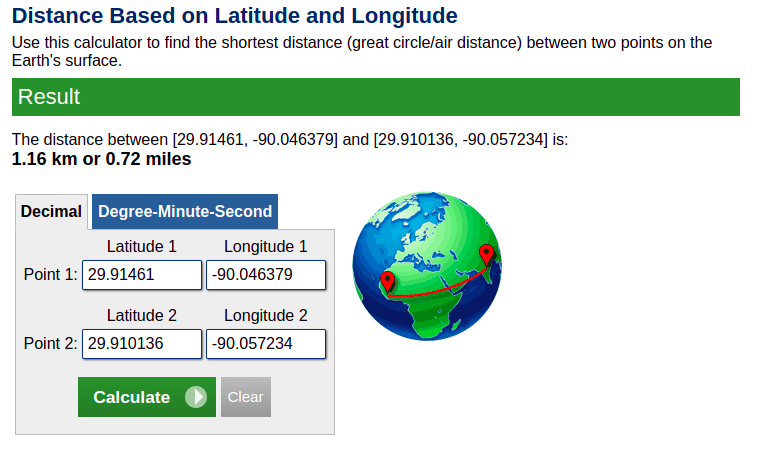